In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/Creditcard_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-fraud/Creditcard_data.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

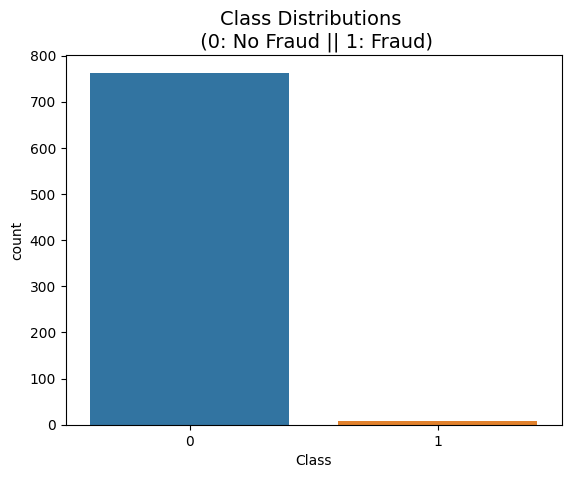

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x = 'Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [6]:
x=df.drop('Class',axis=1)
y=df['Class']

In [7]:
over = RandomOverSampler(random_state=20)
x_over,y_over = over.fit_resample(x,y)

In [8]:
#create and save balanced df
df_balanced = pd.concat([x_over,y_over], axis = 1)
df_balanced.to_csv('Balanced_df.csv', index = False)

In [9]:
df_balanced.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#random sample
np.random.seed(0)
sample_size = (int)((pow(1.96,2)*0.5*0.5)/0.0025)

random_sample = df_balanced.sample(n=sample_size,random_state=0)

In [11]:
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1361,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
511,377,1.166919,0.027049,0.513875,0.860965,-0.519452,-0.681147,0.074992,-0.187776,0.345399,...,-0.202750,-0.441391,-0.025782,0.452607,0.467223,0.262577,-0.023834,0.020521,40.83,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
393,284,-0.810756,0.654499,2.217257,0.104341,-0.286801,0.117833,0.287552,-0.736461,0.699092,...,0.938194,0.571651,-0.101609,0.363928,-0.170947,-0.471524,0.058958,-0.079157,30.30,0
471,346,1.077079,0.284980,0.007731,1.657073,0.052020,0.446389,-0.407036,0.355704,0.626039,...,-0.174337,-0.174161,-0.153375,-0.466331,0.611001,-0.252871,0.090375,0.054820,10.99,0


In [12]:
#Now we will aplly 5 different models to our random sample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
x_random= random_sample.drop(columns=['Class'])
y_random = random_sample['Class']
x_random_train, x_random_test,y_random_train, y_random_test = train_test_split(x_random,y_random, random_state=12, 
                                   test_size=0.25, 
                                   shuffle=True)


# Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive bayes Classifier":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()  
}
acc_l=[]

for name, model in models.items():
    model.fit(x_random_train,y_random_train)
    y_pred = model.predict(x_random_test)
    acc = accuracy_score(y_random_test, y_pred)
    print(f"{name} accuracy: {acc}")
    acc_l.append(acc)
acc_m=pd.DataFrame(acc_l,index=['Logistic Regression','Gradient Boosting','Naive bayes Classifier','Decision Tree','Random Forest'])
acc_m.rename(columns={ acc_m.columns[0]: "Random_Sampling" }, inplace = True)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.90625
Gradient Boosting accuracy: 0.9895833333333334
Naive bayes Classifier accuracy: 0.7291666666666666
Decision Tree accuracy: 0.9791666666666666
Random Forest accuracy: 1.0


In [13]:
acc_m

,Random_Sampling
Logistic Regression,0.906250
Gradient Boosting,0.989583
Naive bayes Classifier,0.729167
Decision Tree,0.979167
Random Forest,1.000000


In [14]:
import math

x = df_balanced.drop(columns=['Class'])
y = df_balanced['Class']

# two starta because 0/1
num_strata = 2

samples = []

# Loop over each stratum
for i in range(num_strata):
    # Subset the data to include only the observations in the current stratum
    stratum_data = df_balanced[df_balanced['Class'] ==i]
    
    # Calculate the sample size for the current stratum
    stratum_size = len(stratum_data)
    population_size=len(df_balanced)
    p=0.5
    error=0.05
    z_score = 1.96  # for a 95% confidence level
    p = stratum_size / population_size
    q = 1 - p
    n = int((z_score**2 * p * q * population_size) / ((z_score**2 * p * q) + (error**2 * (population_size-1))))
    
    
    # If the calculated sample size for the current stratum is greater than the number of observations in the stratum, set the sample size to the number of observations
    if n > stratum_size:
        n = stratum_size
    
    # Randomly select observations from the current stratum to include in the sample
    sample_indices = np.random.choice(stratum_data.index, size=n, replace=False)
    stratum_sample = stratum_data.loc[sample_indices]
    
    # Add the current stratum sample to the list of stratified samples
    samples.append(stratum_sample)

# Combine the stratified samples into a single DataFrame
strat_sample = pd.concat(samples)

# Write the stratified sample to a new CSV file
strat_sample.to_csv('stratified_dataset.csv', index=False)

In [15]:
strat_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
311,222,1.081027,-0.139455,0.483881,0.642057,-0.186845,0.538283,-0.302749,0.315920,0.277328,...,-0.124039,-0.190064,0.057896,-0.269354,0.253835,0.311886,0.001591,-0.003468,17.24,0
355,260,1.075229,-0.335339,1.680468,1.192098,-1.270531,0.313498,-0.871025,0.235402,1.315261,...,0.092930,0.815227,-0.054551,0.731149,0.431465,0.580189,0.062528,0.025628,5.46,0
671,509,1.166592,0.124033,0.381999,1.403556,-0.254473,-0.209577,-0.016417,0.054510,0.475647,...,-0.116682,-0.155497,-0.046085,0.061416,0.622487,-0.308575,0.032173,0.013178,6.99,0
475,352,-0.703183,1.210704,0.713731,1.146381,0.196790,0.468060,0.204977,0.627389,-0.296261,...,-0.052939,0.044339,-0.184853,-0.776439,0.021548,-0.166427,0.297892,0.128381,13.99,0
390,284,-0.942623,0.657318,1.191544,1.326497,0.976745,-0.832970,0.238933,0.163402,-0.584981,...,0.062165,-0.016076,-0.236314,-0.082802,0.357494,-0.110530,0.080796,0.113264,1.00,0


In [16]:
#Now we will aplly 5 different models to our random sample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
x_strat= strat_sample.drop(columns=['Class'])
y_strat = strat_sample['Class']
x_strat_train, x_strat_test,y_strat_train, y_strat_test = train_test_split(x_strat,y_strat, random_state=12, 
                                   test_size=0.25, 
                                   shuffle=True)


# Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive bayes Classifier":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()  
}
acc_l=[]

for name, model in models.items():
    model.fit(x_strat_train,y_strat_train)
    y_pred = model.predict(x_strat_test)
    acc = accuracy_score(y_strat_test, y_pred)
    print(f"{name} accuracy: {acc}")
    acc_l.append(acc)
acc_m['Stratified_sampling']=acc_l

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.9285714285714286
Gradient Boosting accuracy: 0.987012987012987
Naive bayes Classifier accuracy: 0.5844155844155844
Decision Tree accuracy: 0.9805194805194806
Random Forest accuracy: 1.0


In [17]:
acc_m

,Random_Sampling,Stratified_sampling
Logistic Regression,0.906250,0.928571
Gradient Boosting,0.989583,0.987013
Naive bayes Classifier,0.729167,0.584416
Decision Tree,0.979167,0.980519
Random Forest,1.000000,1.000000


In [18]:
# Set the sampling interval "k" as the square root of the number of rows in the dataset
k = int(math.sqrt(n))
df_sys_sample = df_balanced.iloc[::k]

In [19]:
df_sys_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
17,13,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0
34,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
51,36,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
68,44,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,-0.040513,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,45.71,0


In [20]:
#Now we will aplly 5 different models to our random sample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
x_sys= df_sys_sample.drop(columns=['Class'])
y_sys = df_sys_sample['Class']
x_sys_train, x_sys_test,y_sys_train, y_sys_test = train_test_split(x_sys,y_sys, random_state=12, 
                                   test_size=0.25, 
                                   shuffle=True)


# Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive bayes Classifier":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()  
}
acc_l=[]

for name, model in models.items():
    model.fit(x_sys_train,y_sys_train)
    y_pred = model.predict(x_sys_test)
    acc = accuracy_score(y_sys_test, y_pred)
    print(f"{name} accuracy: {acc}")
    acc_l.append(acc)
acc_m['Systematic_sampling']=acc_l

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.782608695652174
Gradient Boosting accuracy: 0.9565217391304348
Naive bayes Classifier accuracy: 0.9130434782608695
Decision Tree accuracy: 1.0
Random Forest accuracy: 1.0


In [21]:
acc_m

,Random_Sampling,Stratified_sampling,Systematic_sampling
Logistic Regression,0.906250,0.928571,0.782609
Gradient Boosting,0.989583,0.987013,0.956522
Naive bayes Classifier,0.729167,0.584416,0.913043
Decision Tree,0.979167,0.980519,1.000000
Random Forest,1.000000,1.000000,1.000000


In [22]:
from imblearn.over_sampling import SMOTE
x = df.drop(columns=['Class'])
y = df['Class']
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)
smote_random = pd.concat((pd.DataFrame(x_smote),pd.DataFrame(y_smote)),axis=1)
np.random.seed(0)

#using the formula
sample_size=int((pow(1.96,2)*0.5*0.5)/0.0025)

df_smote_sample = smote_random.sample(n=sample_size, random_state=0)

In [23]:
df_smote_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1361,424,-1.976060,1.574621,-0.795997,3.071299,-0.160657,-1.298907,-1.707645,1.015634,-2.131833,...,0.407727,0.041801,-0.414877,0.336030,0.128697,0.024420,0.172353,-0.139023,0.24287,1
511,377,1.166919,0.027049,0.513875,0.860965,-0.519452,-0.681147,0.074992,-0.187776,0.345399,...,-0.202750,-0.441391,-0.025782,0.452607,0.467223,0.262577,-0.023834,0.020521,40.83000,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68000,0
393,284,-0.810756,0.654499,2.217257,0.104341,-0.286801,0.117833,0.287552,-0.736461,0.699092,...,0.938194,0.571651,-0.101609,0.363928,-0.170947,-0.471524,0.058958,-0.079157,30.30000,0
471,346,1.077079,0.284980,0.007731,1.657073,0.052020,0.446389,-0.407036,0.355704,0.626039,...,-0.174337,-0.174161,-0.153375,-0.466331,0.611001,-0.252871,0.090375,0.054820,10.99000,0


In [24]:
#Now we will aplly 5 different models to our random sample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
x_smote= df_smote_sample.drop(columns=['Class'])
y_smote = df_smote_sample['Class']
x_smote_train, x_smote_test,y_smote_train, y_smote_test = train_test_split(x_smote,y_smote, random_state=12, 
                                   test_size=0.25, 
                                   shuffle=True)


# Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive bayes Classifier":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()  
}
acc_l=[]

for name, model in models.items():
    model.fit(x_smote_train,y_smote_train)
    y_pred = model.predict(x_smote_test)
    acc = accuracy_score(y_smote_test, y_pred)
    print(f"{name} accuracy: {acc}")
    acc_l.append(acc)
acc_m['SMOTE_sampling']=acc_l

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.8854166666666666
Gradient Boosting accuracy: 0.9895833333333334
Naive bayes Classifier accuracy: 0.8541666666666666
Decision Tree accuracy: 0.9791666666666666
Random Forest accuracy: 0.9895833333333334


In [25]:
acc_m

,Random_Sampling,Stratified_sampling,Systematic_sampling,SMOTE_sampling
Logistic Regression,0.906250,0.928571,0.782609,0.885417
Gradient Boosting,0.989583,0.987013,0.956522,0.989583
Naive bayes Classifier,0.729167,0.584416,0.913043,0.854167
Decision Tree,0.979167,0.980519,1.000000,0.979167
Random Forest,1.000000,1.000000,1.000000,0.989583


In [26]:
# Undersampling before cross validating (prone to overfit), here we take x as 1 (fraud)
x = df.drop('Class', axis=1)
y = df['Class']

In [27]:
#Now we will aplly 5 different models to our random sample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
x_under= x
y_under = y
x_under_train, x_under_test,y_under_train, y_under_test = train_test_split(x_under,y_under, random_state=12, 
                                   test_size=0.25, 
                                   shuffle=True)


# Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive bayes Classifier":GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()  
}
acc_l=[]

for name, model in models.items():
    model.fit(x_under_train,y_under_train)
    y_pred = model.predict(x_under_test)
    acc = accuracy_score(y_under_test, y_pred)
    print(f"{name} accuracy: {acc}")
    acc_l.append(acc)
acc_m['Under_sampling']=acc_l

Logistic Regression accuracy: 0.9896373056994818

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Gradient Boosting accuracy: 0.9896373056994818
Naive bayes Classifier accuracy: 0.9015544041450777
Decision Tree accuracy: 0.9896373056994818
Random Forest accuracy: 0.9896373056994818


In [28]:
acc_m

,Random_Sampling,Stratified_sampling,Systematic_sampling,SMOTE_sampling,Under_sampling
Logistic Regression,0.906250,0.928571,0.782609,0.885417,0.989637
Gradient Boosting,0.989583,0.987013,0.956522,0.989583,0.989637
Naive bayes Classifier,0.729167,0.584416,0.913043,0.854167,0.901554
Decision Tree,0.979167,0.980519,1.000000,0.979167,0.989637
Random Forest,1.000000,1.000000,1.000000,0.989583,0.989637
